In [7]:
!pip install textblob
!pip install requests
!pip install wordcloud
!pip install imageio
!pip install nltk


In [8]:

import nltk
from textblob import TextBlob
import requests
import imageio
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:

target_url = 'http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text


blob = TextBlob(data)


In [10]:

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


words = [word.lower() for word in blob.words if word.isalpha() and word.lower() not in stop_words]


word_freq = nltk.FreqDist(words)


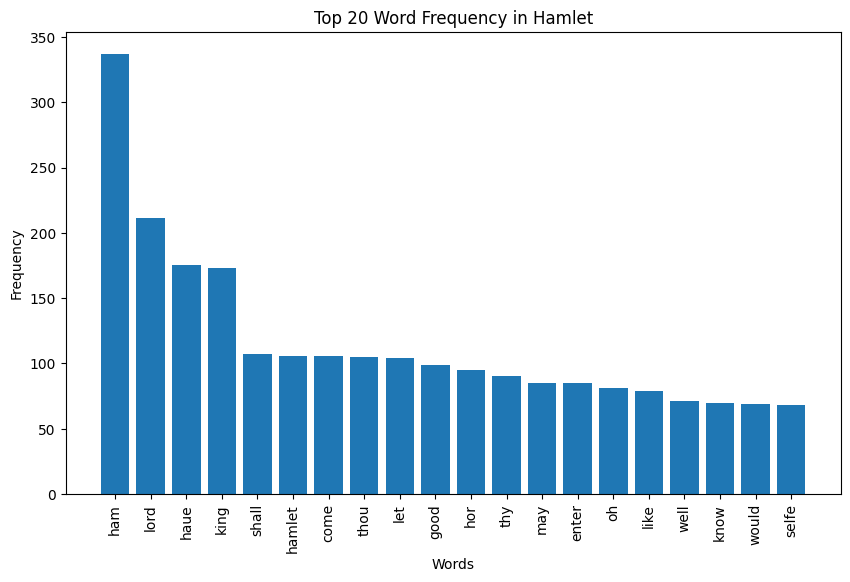

In [11]:
top_words = word_freq.most_common(20)


plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words))
plt.title('Top 20 Word Frequency in Hamlet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


In [12]:
image_url = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_url)


<ipython-input-12-d34b07f0d771>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_url)


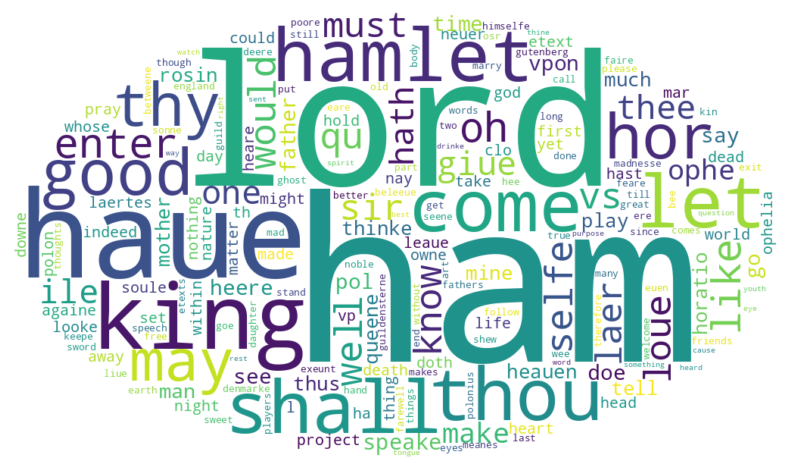

In [13]:
wordcloud = WordCloud(width=800, height=400, mask=mask_image, background_color='white').generate_from_frequencies(word_freq)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
wordcloud.to_file("Hamlet_wordcloud.png")
plt.savefig("Hamlet_word_freq_bar.png")


<Figure size 640x480 with 0 Axes>